###Python Basic Assignment 14


**What does RGBA stand for?**

RGBA stands for red green blue alpha. While it is sometimes described as a color space, it is actually a three-channel RGB color model supplemented with a fourth alpha channel.The A stands for Alpha, which refers to the level of transparency or opacity of the color.


Computer programs often represent a color in an image as an RGBA value. An RGBA value is a group of numbers that specify the amount of red, green, blue, and alpha (or transparency) in a color. Each of these component values is an integer from 0 (none at all) to 255 (the maximum). These RGBA values are assigned to individual pixels; a pixel is the smallest dot of a single color the computer screen can show (as you can imagine, there are millions of pixels on a screen). A pixel’s RGB setting tells it precisely what shade of color it should display. Images also have an alpha value to create RGBA values. If an image is displayed on the screen over a background image or desktop wallpaper, the alpha value determines how much of the background you can “see through” the image’s pixel.

**2. From the Pillow module, how do you get the RGBA value of any images?**

In Pillow, RGBA values are represented by a tuple of four integer values. For example, the color red is represented by (255, 0, 0, 255). This color has the maximum amount of red, no green or blue, and the maximum alpha value, meaning it is fully opaque. Green is represented by (0, 255, 0, 255), and blue is (0, 0, 255, 255). White, the combination of all colors, is (255, 255, 255, 255), while black, which has no color at all, is (0, 0, 0, 255).

If a color has an alpha value of 0, it is invisible, and it doesn’t really matter what the RGB values are. After all, invisible red looks the same as invisible black.

example:

White (255, 255, 255, 255)

Gray  (128, 128, 128, 255)

Blue  (0, 0, 255, 255)

Black (0, 0, 0, 255)

Pillow offers the ***ImageColor.getcolor()*** function so you don’t have to memorize RGBA values for the colors you want to use. This function takes a color name string as its first argument, and the string 'RGBA' as its second argument, and it returns an RGBA tuple.

In [1]:
!pip install pillow

In [2]:
from PIL import ImageColor  #he module name of Pillow is PIL to make it backward compatible with an older module called Python Imaging Library
ImageColor.getcolor('red', 'RGBA')

(255, 0, 0, 255)

In [3]:
ImageColor.getcolor('white', 'RGBA')

(255, 255, 255, 255)

In [4]:
ImageColor.getcolor('blue', 'RGBA')

(0, 0, 255, 255)

**3. What is a box tuple, and how does it work?**

Image pixels are addressed with x- and y-coordinates, which respectively specify a pixel’s horizontal and vertical location in an image. The origin is the pixel at the top-left corner of the image and is specified with the notation (0, 0). The first zero represents the x-coordinate, which starts at zero at the origin and increases going from left to right. The second zero represents the y-coordinate, which starts at zero at the origin and increases going down the image. This bears repeating: y-coordinates increase going downward, which is the opposite of how you may remember y-coordinates being used in math class.

Many of Pillow’s functions and methods take a ***box tuple*** argument. This means Pillow is expecting a tuple of four integer coordinates that represent a rectangular region in an image. The four integers are, in order, as follows:



```
Left: The x-coordinate of the leftmost edge of the box.

Top: The y-coordinate of the top edge of the box.

Right: The x-coordinate of one pixel to the right of the rightmost edge of the box. This integer must be greater than the left integer.

Bottom: The y-coordinate of one pixel lower than the bottom edge of the box. This integer must be greater than the top integer.

```



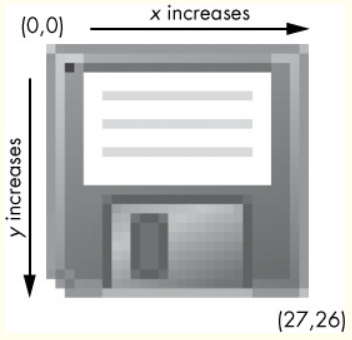

The x- and y-coordinates of a 27×26 image of some sort of ancient data storage device

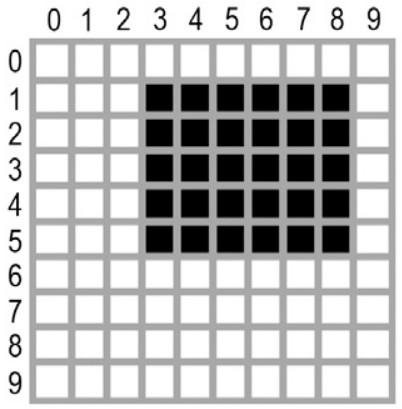

Note that the box includes the left and top coordinates and goes up to but does not include the right and bottom coordinates. For example, the box tuple (3, 1, 9, 6) represents all the pixels in the black box

**4. Use your image and load in notebook then, How can you find out the width and height of an Image object?**

In [5]:
from PIL import Image
try:
  img = Image.open("/content/pexels-pixabay-60597.jpg")   #The Image.open() function returns a value of the Image object data type, which is how Pillow represents an image as a Python value
except:
  print("Image not found!!!")

In [7]:
img.size

(3648, 2736)

In [8]:
width,height = img.size
print("width :", width)
print("height :", height)

width : 3648
height : 2736


In [9]:
img.filename

'/content/pexels-pixabay-60597.jpg'

In [11]:
img.format,img.format_description

('JPEG', 'JPEG (ISO 10918)')

In [12]:
img.save("flower.png") #saving to png format

**5. What method would you call to get Image object for a 100×100 image, excluding the lower-left quarter of it?**

Cropping an image means selecting a rectangular region inside an image and removing everything outside the rectangle. The crop() method on Image objects takes a box tuple and returns an Image object representing the cropped image. The cropping does not happen in place—that is, the original Image object is left untouched, and the crop() method returns a new Image object. Remeber that a boxed tuple—in this case, the cropped section—includes the left column and top row of pixels but only goes up to and does not include the right column and bottom row of pixels.

In [14]:
croppedImg = img.crop((0, 0, 100, 100))

In [15]:
croppedImg.save("cropped.jpg") 

This makes a new Image object for the cropped image, stores the object in croppedImg, and then calls save() on croppedImg to save the cropped image in cropped.jpg

**6. After making changes to an Image object, how could you save it as an image file?**

save() method is used to save the image object in image file (jpg,png or gif)

**7. What module contains Pillow’s shape-drawing code?**

If we need to draw lines, rectangles, circles, or other simple shapes on an image, use Pillow’s ImageDraw module.

In [16]:
from PIL import Image, ImageDraw
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)

First, we import Image and ImageDraw. Then we create a new image, in this case, a 200×200 white image, and store the Image object in im. We pass the Image object to the ImageDraw.Draw() function to receive an ImageDraw object. This object has several methods for drawing shapes and text onto an Image object. Store the ImageDraw object in a variable like draw so you can use it easily in the following example.

In [17]:
draw.line([(0, 0), (199, 0), (199, 199), (0, 199), (0, 0)], fill='black')

In [18]:
draw.rectangle((20, 30, 60, 60), fill='blue')

In [19]:
draw.ellipse((120, 30, 160, 60), fill='red')

In [20]:
draw.polygon(((57, 87), (79, 62), (94, 85), (120, 90), (103, 113)),fill='brown')

In [21]:
for i in range(100, 200, 10):
  draw.line([(i, 0), (200, i - 100)], fill='green')

In [22]:
im.save('drawing.png')

output:

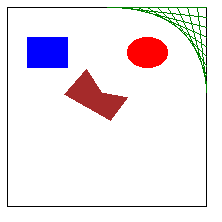

After making an Image object for a 200×200 white image, passing it to ImageDraw.Draw() to get an ImageDraw object, and storing the ImageDraw object in draw, we can call drawing methods on draw. Here we make a thin, black outline at the edges of the image, a blue rectangle with its top-left corner at (20, 30) and bottom-right corner at (60, 60), a red ellipse defined by a box from (120, 30) to (160, 60), a brown polygon with five points, and a pattern of green lines drawn with a for loop.

**8. Image objects do not have drawing methods. What kind of object does? How do you get this kind of object?**

To draw the image first we need to convert the image object into ImageDraw thereafer we can draw the shapes like:



**Points**
The point(xy, fill) method draws individual pixels. The xy argument represents a list of the points you want to draw. The list can be a list of x- and y-coordinate tuples, such as [(x, y), (x, y), ...], or a list of x- and y-coordinates without tuples, such as [x1, y1, x2, y2, ...]. The fill argument is the color of the points and is either an RGBA tuple or a string of a color name, such as 'red'. The fill argument is optional.

**Lines**
The line(xy, fill, width) method draws a line or series of lines. xy is either a list of tuples, such as [(x, y), (x, y), ...], or a list of integers, such as [x1, y1, x2, y2, ...]. Each point is one of the connecting points on the lines you’re drawing. The optional fill argument is the color of the lines, as an RGBA tuple or color name. The optional width argument is the width of the lines and defaults to 1 if left unspecified.

**Rectangles**
The rectangle(xy, fill, outline) method draws a rectangle. The xy argument is a box tuple of the form (left, top, right, bottom). The left and top values specify the x- and y-coordinates of the upper-left corner of the rectangle, while right and bottom specify the lower-right corner. The optional fill argument is the color that will fill the inside of the rectangle. The optional outline argument is the color of the rectangle’s outline.

**Ellipses**
The ellipse(xy, fill, outline) method draws an ellipse. If the width and height of the ellipse are identical, this method will draw a circle. The xy argument is a box tuple (left, top, right, bottom) that represents a box that precisely contains the ellipse. The optional fill argument is the color of the inside of the ellipse, and the optional outline argument is the color of the ellipse’s outline.

**Polygons**
The polygon(xy, fill, outline) method draws an arbitrary polygon. The xy argument is a list of tuples, such as [(x, y), (x, y), ...], or integers, such as [x1, y1, x2, y2, ...], representing the connecting points of the polygon’s sides. The last pair of coordinates will be automatically connected to the first pair. The optional fill argument is the color of the inside of the polygon, and the optional outline argument is the color of the polygon’s outline.